# Data Processing and Joining

We have two datasets that require different levels of processing.  Many of the experimental variables were pre-processed and stored in a .csv file called "summerdata.csv" however the higher-quality data for temperature, wind speed, and wind direction was originally scattered across several folders and files.

The code below first processes the sonic data and then combines it with the summerdata.csv to create a complete dataframe for analysis.

# Processing of the Sonic Data

The sonic data was taken at 20Hz frequency from May 18 to August 19, 2017 and included several measurements such as Ux, Uy, Uz (wind speed and direction), Tsonic and FW (temperature), relative humidity, radiation.  In its raw form, this data is binary and not easily usable.  The data was first converted from its binary state into readable CSVs using the LoggerNet software associated with the Campbell Scientific dataloggers.  These CSVs were scattered among subfolders for each day of the experiment, totaling a size of 48 GB, with data that remained unusable.

The data was then processed with "UTESpac," found at the link below, which reduced the data using 1-minute averages (to match the other experimental data frequency), re-oriented the measurements, and stored the data into a Matlab structure.
https://github.com/derek591/UTESpac

Due to minor differences in the measurement data taken, resulting in different numbers of columns among files, UTESpac was run twice for the two subsets of files with matching numbers of columns, resulting in two output Matlab structures.  UTESpac ran for a total of approximately 2.5 hours to process all files.  Since we only needed two variables from this structure, which contained our wind speed, wind direction, and temperature, Matlab's "csvwrite" function was used as shown below.  

csvwrite('Sonic20Hz.csv',outputStruct.Sonic20Hz) <br>
csvwrite('spdAndDir.csv',outputStruct.spdAndDir)

Four .csv files were generated for the two UTESpac outputs and concatenated using the code below.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# concatenate data into one usable spreadsheet

# "L" = lower sonic at 0.91m
# "M" = middle sonic at 1.829m
# "U" = upper sonic at 2.769m

# for "Sonic20Hz.csv" files
names = ['TIMESTAMP','Ux_0.91','Uy_0.91','Uz_0.91','T_Sonic_L','sonic_diag_0.91',
          'Ux_1.829','Uy_1.829','Uz_1.829','T_Sonic_M','sonic_diag_1.829',
          'Ux_2.769','Uy_2.769','Uz_2.769','T_Sonic_U','sonic_diag_2.769']

namesboth = ['TIMESTAMP','Ux_0.91','Uy_0.91','Uz_0.91','T_Sonic_L','sonic_diag_0.91','FW_L',
          'Ux_1.829','Uy_1.829','Uz_1.829','T_Sonic_M','sonic_diag_1.829','FW_M',
          'Ux_2.769','Uy_2.769','Uz_2.769','T_Sonic_U','sonic_diag_2.769','FW_U']

# for "spdAndDir.csv" files
names2 = ['TIMESTAMP','L direction','L speed','0.91m flag 295<dir<335',
          'M direction','M speed','1.829m flag 295<dir<335',	
          'U direction','U speed','2.769m flag 295<dir<335']

#load in csv for most of the data
dfsonic = pd.read_csv('sonic data/Sonic20Hz_1min.csv',header=None,names=names,index_col=False)
dflongtime = pd.read_csv('sonic data/longtime.csv',header=None,names=['TIME'],parse_dates=True,infer_datetime_format=True)
dflongtime['TIME'] = pd.to_datetime(dflongtime['TIME'],infer_datetime_format=True)
dfsonic['TIMESTAMP'] = dflongtime['TIME'] #replace TIMESTAMP column w/ date-time strings

#plt.plot(x=dfsonic['TIMESTAMP'],y=dfsonic['T_Sonic_L'])

dfspddir = pd.read_csv('sonic data/spdAndDir_1min.csv',header=None,names=names2,index_col=False)
dfspddir['TIMESTAMP'] = dflongtime[['TIME']] #replace TIMESTAMP column w/ date-time strings

#load in csv for last 4 days of the data
dfsonic_bothT = pd.read_csv('sonic data/Sonic20Hz_1min_bothT.csv',header=None,names=namesboth,index_col=False)
dfshorttime = pd.read_csv('sonic data/shorttime.csv',header=None,names=['TIME'],parse_dates=True)
dfshorttime['TIME'] = pd.to_datetime(dfshorttime['TIME'],infer_datetime_format=True)
dfsonic_bothT['TIMESTAMP'] = dfshorttime[['TIME']]

dfspddir_bothT = pd.read_csv('sonic data/spdAndDir_1min_bothT.csv',header=None,names=names2,index_col=False)
dfspddir_bothT['TIMESTAMP'] = dfshorttime[['TIME']]

In [3]:
#%% eliminate all unnecessary columns; keep only temperature columns
dfsonic = dfsonic[['TIMESTAMP','T_Sonic_L','T_Sonic_M','T_Sonic_U']]
dfsonic_bothT = dfsonic_bothT[['TIMESTAMP','T_Sonic_L','FW_L','T_Sonic_M','FW_M','T_Sonic_U','FW_U']]
dfspddir = dfspddir[['TIMESTAMP','L direction','L speed','M direction','M speed','U direction','U speed']]
dfspddir_bothT = dfspddir_bothT[['TIMESTAMP','L direction','L speed','M direction','M speed','U direction','U speed']]

print('dfsonic:\n')
print(dfsonic.head())
print('\n dfsonic_both:\n')
print(dfsonic_bothT.head())
print('\n dfspddir:\n')
print(dfspddir.head())
print('\n dfspddir_both:\n')
print(dfspddir_bothT.head())

dfsonic:

            TIMESTAMP  T_Sonic_L  T_Sonic_M  T_Sonic_U
0 2017-05-18 00:01:00        NaN        NaN        NaN
1 2017-05-18 00:02:00        NaN        NaN        NaN
2 2017-05-18 00:03:00        NaN        NaN        NaN
3 2017-05-18 00:04:00        NaN        NaN        NaN
4 2017-05-18 00:05:00        NaN        NaN        NaN

 dfsonic_both:

            TIMESTAMP  T_Sonic_L  FW_L  T_Sonic_M  FW_M  T_Sonic_U  FW_U
0 2017-08-17 00:01:00        NaN   NaN        NaN   NaN        NaN   NaN
1 2017-08-17 00:02:00        NaN   NaN        NaN   NaN        NaN   NaN
2 2017-08-17 00:03:00        NaN   NaN        NaN   NaN        NaN   NaN
3 2017-08-17 00:04:00        NaN   NaN        NaN   NaN        NaN   NaN
4 2017-08-17 00:05:00        NaN   NaN        NaN   NaN        NaN   NaN

 dfspddir:

            TIMESTAMP  L direction  L speed  M direction  M speed  \
0 2017-05-18 00:01:00          NaN      NaN          NaN      NaN   
1 2017-05-18 00:02:00          NaN      NaN          N

# Adjustment of Temperature Variable within Sonic Data

For the first half of the experiment, temperature was measured by the sonics themselves in a variable called "T_sonic."  This method of measuring temperature can be inaccurate.  For the second half of the experiment, temperature was measured by finewire sensors in a variable called "FW."  This method of measuring temperature is accurate.  During the last 4 days of the experiment, temperature was measured by both methods, adding another column to that subset of the data. The difference between T_sonic and FW is quantified using the last 4 days of the experiment when both measurement methods were present.  

The following code finds this adjustment value, adjusts T_sonic during the first half of the summer, and combines all the sonic data into a single dataset.

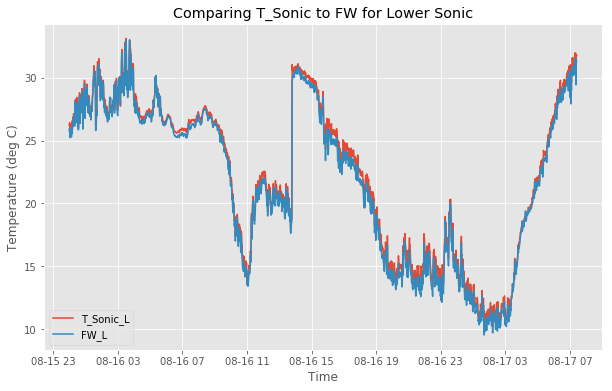

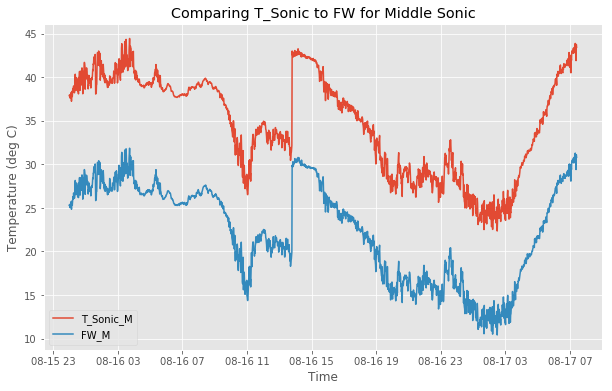

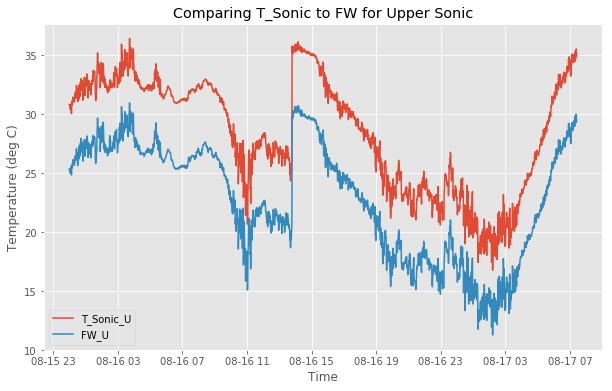

Difference between T_sonic and FW for Lower Sonic
count    1886.000000
mean        0.446177
std         0.210491
min        -0.545000
25%         0.310250
50%         0.447000
75%         0.590000
max         1.237000
Name: diff_L, dtype: float64 

Difference between T_sonic and FW for Middle Sonic
count    1886.000000
mean       12.368353
std         0.218397
min        11.567000
25%        12.256000
50%        12.387000
75%        12.497000
max        13.134000
Name: diff_M, dtype: float64 

Difference between T_sonic and FW for Upper Sonic
count    1886.000000
mean        5.608394
std         0.242970
min         4.698000
25%         5.453000
50%         5.608000
75%         5.778000
max         6.229000
Name: diff_U, dtype: float64 



/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [4]:
#%% finding adjustment value for Tsonic

temp_cols = ['T_Sonic_L','FW_L','T_Sonic_M','FW_M','T_Sonic_U','FW_U']
dftest = dfsonic_bothT.dropna(axis=0, how='all', subset = temp_cols) #drop all rows that contain all NaNs

time = pd.date_range(start='2017-08-16', periods=dftest.shape[0], freq='1min') #create time vector for visualization purposes only

plt.plot(time,dftest['T_Sonic_L'])
plt.plot(time,dftest['FW_L'])
plt.title('Comparing T_Sonic to FW for Lower Sonic')
plt.xlabel('Time')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.show()

plt.plot(time,dftest['T_Sonic_M'])
plt.plot(time,dftest['FW_M'])
plt.title('Comparing T_Sonic to FW for Middle Sonic')
plt.xlabel('Time')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.show()

plt.plot(time,dftest['T_Sonic_U'])
plt.plot(time,dftest['FW_U'])
plt.title('Comparing T_Sonic to FW for Upper Sonic')
plt.xlabel('Time')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.show()

# based on plots above, deltas look constant
# will try calculating constant value, subtracting from T_Sonic
# and plotting results

#add columns of deltas to existing df
dftest['diff_L'] = dftest['T_Sonic_L']-dftest['FW_L']
dftest['diff_M'] = dftest['T_Sonic_M']-dftest['FW_M']
dftest['diff_U'] = dftest['T_Sonic_U']-dftest['FW_U']

print('Difference between T_sonic and FW for Lower Sonic')
print(dftest['diff_L'].describe(),'\n')
print('Difference between T_sonic and FW for Middle Sonic')
print(dftest['diff_M'].describe(),'\n')
print('Difference between T_sonic and FW for Upper Sonic')
print(dftest['diff_U'].describe(),'\n')

On the lower sonic, because the mean and max temperature difference between the two measuremnts T_sonic and Finewire were so small (<1 deg C), no adjustment is needed.

On the middle sonic, the mean temperatue difference is 12.4 deg C and standard deviation was 0.2 deg C, so an adjustment value of 12.4 deg C was chosen.

On the upper sonic, the mean temperatue difference is 5.6 deg C and standard deviation was 0.2 deg C, so an adjustment value of 5.6 deg C was chosen. 


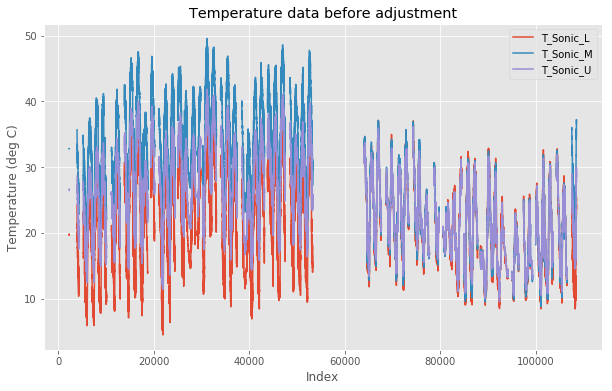

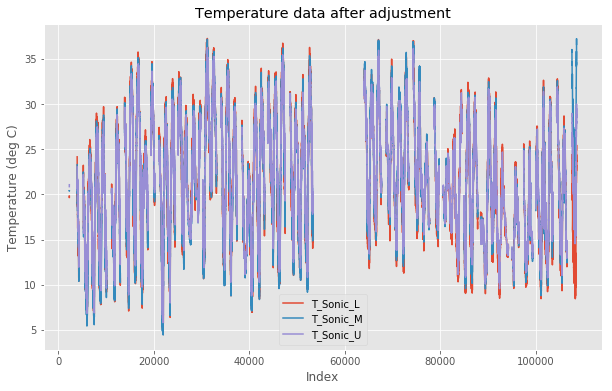

In [5]:
#%% adjust T_sonic_M and T_sonic_U

# visualize data before correction
plt.plot(dfsonic['T_Sonic_L']) #visualize
plt.plot(dfsonic['T_Sonic_M']) #visualize
plt.plot(dfsonic['T_Sonic_U']) #visualize
plt.title('Temperature data before adjustment')
plt.xlabel('Index')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.show()

#correct first half of data
N = int(dfsonic.shape[0]/2)
dfsonic['T_Sonic_M'][:N] = dfsonic['T_Sonic_M'][:N] - 12.4
dfsonic['T_Sonic_U'][:N] = dfsonic['T_Sonic_U'][:N] - 5.6

plt.plot(dfsonic['T_Sonic_L']) #visualize
plt.plot(dfsonic['T_Sonic_M']) #visualize
plt.plot(dfsonic['T_Sonic_U']) #visualize
plt.title('Temperature data after adjustment')
plt.xlabel('Index')
plt.ylabel('Temperature (deg C)')
plt.legend()
plt.show()

In [6]:
#%% swap contents of T_Sonic and FW columns because we are going to disregard T_sonic and replace everything with an adjusted temperature
dfsonic_bothT[['T_Sonic_L', 'FW_L']] = dfsonic_bothT[['FW_L', 'T_Sonic_L']]
dfsonic_bothT[['T_Sonic_M', 'FW_M']] = dfsonic_bothT[['FW_M', 'T_Sonic_M']]
dfsonic_bothT[['T_Sonic_U', 'FW_U']] = dfsonic_bothT[['FW_U', 'T_Sonic_U']]

dfsoniclast = dfsonic_bothT[['TIMESTAMP','T_Sonic_L','T_Sonic_M','T_Sonic_U']] #get rid of inaccurate measurements now called 'FW'

In [7]:
#%% concatenate sonic data

#concatenate vertically
dftempcc = pd.concat([dfsonic, dfsoniclast], ignore_index=True)
print('Concatenated temperature dataframe shape: ',dftempcc.shape)

dfsdcc = pd.concat([dfspddir, dfspddir_bothT], ignore_index=True)
print('Concatenated spd+dir dataframe shape: ',dftempcc.shape)

#concatenate horizontally
#df = pd.concat([dfsdcc, dftempcc], axis=1, verify_integrity=True)  #verify that TIMESTAMP col is same: it is
#df = pd.merge(left=dfsdcc, right=dftempcc, how='left', on='TIMESTAMP')
dfson = pd.concat([dfsdcc, dftempcc[['T_Sonic_L', 'T_Sonic_M', 'T_Sonic_U']]], axis=1)
#df = df.drop(df.columns[7], axis=1)#drop 2nd TIMESTAMP column
print('Concatenated, complete dataframe shape: ',dfson.shape,'\n')
print(dfson.head())
print('\n Dataframe Info: \n',dfson.describe())

Concatenated temperature dataframe shape:  (113760, 4)
Concatenated spd+dir dataframe shape:  (113760, 4)
Concatenated, complete dataframe shape:  (113760, 10) 

            TIMESTAMP  L direction  L speed  M direction  M speed  \
0 2017-05-18 00:01:00          NaN      NaN          NaN      NaN   
1 2017-05-18 00:02:00          NaN      NaN          NaN      NaN   
2 2017-05-18 00:03:00          NaN      NaN          NaN      NaN   
3 2017-05-18 00:04:00          NaN      NaN          NaN      NaN   
4 2017-05-18 00:05:00          NaN      NaN          NaN      NaN   

   U direction  U speed  T_Sonic_L  T_Sonic_M  T_Sonic_U  
0          NaN      NaN        NaN        NaN        NaN  
1          NaN      NaN        NaN        NaN        NaN  
2          NaN      NaN        NaN        NaN        NaN  
3          NaN      NaN        NaN        NaN        NaN  
4          NaN      NaN        NaN        NaN        NaN  

 Dataframe Info: 
         L direction       L speed   M direction  

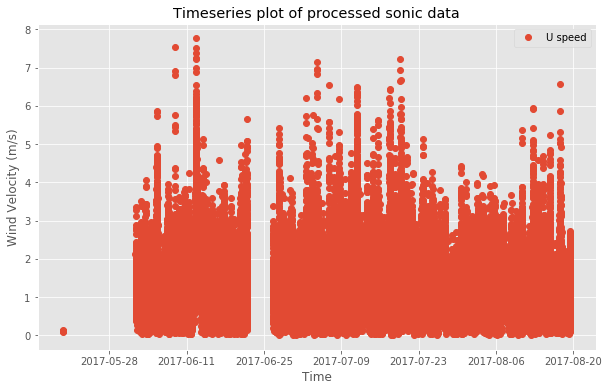

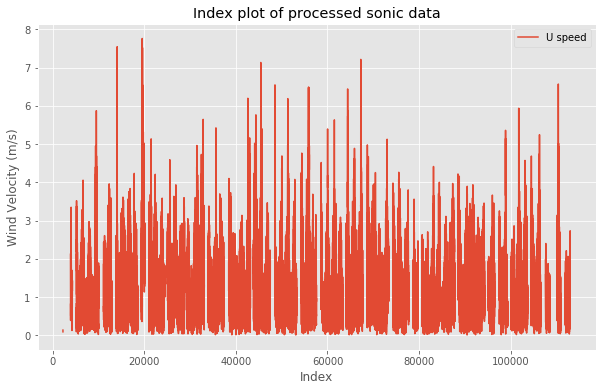

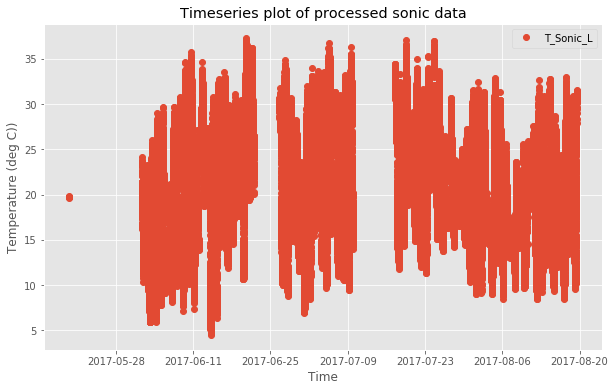

In [8]:
#%% plots: visualize processed sonic data
plt.plot_date(x=dfson['TIMESTAMP'],y=dfson['U speed'])
plt.title('Timeseries plot of processed sonic data')
plt.xlabel('Time')
plt.ylabel('Wind Velocity (m/s)')
plt.legend()
plt.show()

plt.plot(dfson['U speed'])
plt.title('Index plot of processed sonic data')
plt.xlabel('Index')
plt.ylabel('Wind Velocity (m/s)')
plt.legend()
plt.show()

plt.plot_date(x=dfson['TIMESTAMP'],y=dfson['T_Sonic_L'])
plt.title('Timeseries plot of processed sonic data')
plt.xlabel('Time')
plt.ylabel('Temperature (deg C))')
plt.legend()
plt.show()

# Processing and Joining with "summerdata.csv"

The following code joins the two datasets wherever TIMESTAMP exists in both datasets.

In [9]:
data = pd.read_csv('summerdata.csv')
data = data.rename(columns={"Time":"TIMESTAMP"})

In [10]:
#convert TIMESTAMP column to datetime type
dfsummertime = pd.read_csv('summertimestamp.csv',header=None,names=['TIME'],parse_dates=True,infer_datetime_format=True)
dfsummertime['TIME'] = pd.to_datetime(dfsummertime['TIME'],infer_datetime_format=True)
data['TIMESTAMP'] = dfsummertime['TIME'] #replace TIMESTAMP column w/ date-time strings
data2017 = data[(data['TIMESTAMP']>'2017-01-01')] #only select data from 2017
#data2017['TIMESTAMP'] = pd.to_datetime(data2017['TIMESTAMP'],infer_datetime_format=True)
#data2017 = data2017.reset_index()

print('summerdata:')
print(data2017.head())
#print('ensure TIMESTAMP column is correct datetime data type: \n',data2017['TIMESTAMP'].describe())


summerdata:
              TIMESTAMP  ApogSWup  ApogSWdn  ApogLWup  ApogLWdn  CNR_SWup  \
243 2017-05-18 13:18:00       NaN       NaN       NaN       NaN       NaN   
244 2017-05-18 13:19:00       NaN       NaN       NaN       NaN     1.106   
245 2017-05-18 13:20:00       NaN       NaN       NaN       NaN     1.175   
246 2017-05-18 13:21:00       NaN       NaN       NaN       NaN     1.032   
247 2017-05-18 13:22:00       NaN       NaN       NaN       NaN     1.370   

     CNR_SWdn  CNR_LWup  CNR_LWdn  HMP_TempC ...  TempTmid    TempT  CupWS_ms  \
243       NaN       NaN       NaN        NaN ...    59.613  61.9226       NaN   
244    -0.045     410.2    418.80    15.9477 ...       NaN      NaN     2.867   
245     0.083     410.3    418.50    16.0431 ...       NaN      NaN     2.867   
246     0.030     410.5    418.20    16.0593 ...       NaN      NaN     2.867   
247     0.427     411.7    419.15    16.4896 ...       NaN      NaN     2.867   

     CupWD  CupWD_SD  FinewireT_Top  F

In [11]:
#%% merge data2017 with dfson

#dfson['TIMESTAMP']=dfson['TIMESTAMP'].replace(second=0, microsecond=0)
#data2017['TIMESTAMP'].replace(second=0, microsecond=0)
#data2017['TIMESTAMP']=data2017['TIMESTAMP'].strftime('%Y-%m-%d %H:%M')

# ensure both 'TIMESTAMP' columns are in matching format
#data2017['TIMESTAMP'] = data2017['TIMESTAMP'].apply(lambda dt: dt.replace(second=0, microsecond=0))
data2017['TIMESTAMP'] = data2017['TIMESTAMP'].apply(lambda dt: dt.strftime('%Y-%m-%d %H:%M'))

#dfson['TIMESTAMP'] = dfson['TIMESTAMP'].apply(lambda dt: dt.replace(second=0, microsecond=0))
dfson['TIMESTAMP'] = dfson['TIMESTAMP'].apply(lambda dt: dt.strftime('%Y-%m-%d %H:%M'))

#intersection = np.intersect1d(dfson['TIMESTAMP'], data2017['TIMESTAMP'])
#difference = np.setdiff1d(dfson['TIMESTAMP'], data2017['TIMESTAMP'])

#dfjoined = df.join(data2017, on='TIMESTAMP',how='outer',lsuffix='_left')
#dfjoined = pd.merge(data2017, df, how='inner', on=['TIMESTAMP'])

dfjoined = data2017.set_index('TIMESTAMP').join(dfson.set_index('TIMESTAMP')) #join the two datasets
print('joined dataset shape:',dfjoined.shape)
print('Joined DF created by joining df of shape:',dfson.shape,'and data2017 of shape:',data2017.shape)
print('# rows in common:',dfjoined.shape[0],' out of: ',dfson.shape[0])
print('Joined DF:',dfjoined.head())

/Users/Owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


joined dataset shape: (108474, 43)
Joined DF created by joining df of shape: (113760, 10) and data2017 of shape: (107118, 35)
# rows in common: 108474  out of:  113760
Joined DF:                   ApogSWup  ApogSWdn  ApogLWup  ApogLWdn  CNR_SWup  CNR_SWdn  \
TIMESTAMP                                                                      
2017-05-18 13:18       NaN       NaN       NaN       NaN       NaN       NaN   
2017-05-18 13:19       NaN       NaN       NaN       NaN     1.106    -0.045   
2017-05-18 13:20       NaN       NaN       NaN       NaN     1.175     0.083   
2017-05-18 13:21       NaN       NaN       NaN       NaN     1.032     0.030   
2017-05-18 13:22       NaN       NaN       NaN       NaN     1.370     0.427   

                  CNR_LWup  CNR_LWdn  HMP_TempC    HMP_RH    ...       h  \
TIMESTAMP                                                    ...           
2017-05-18 13:18       NaN       NaN        NaN       NaN    ...     NaN   
2017-05-18 13:19     410.2    41

In [12]:
#%% eliminate unnecessary columns: 'BattV', 'Btemp1',
#       'Btemp2', 'Btemp3', 'Btemp4', 'Btemp5', 'Btemp6', 'TempBmid', 'Btemp14',
#       'Btemp15', 'Btemp16', 'TempB', 'Btemp22', 'Btemp23', 'TempTmid',
#       'TempT', 'FinewireT_Top', 'FinewireT_Mid', 'FinewireT_Bot',

      # removing FW temperature and local solar panel temperatures from summerdata.csv
cols = ['ApogSWup', 'ApogSWdn', 'ApogLWup', 'ApogLWdn', 'CNR_SWup', 'CNR_SWdn',
       'CNR_LWup', 'CNR_LWdn', 'HMP_TempC', 'HMP_RH', 'CupWS_ms', 'CupWD', 'CupWD_SD', 'q', 'h', 'L direction', 'L speed',
       'M direction', 'M speed', 'U direction', 'U speed', 'T_Sonic_L',
       'T_Sonic_M', 'T_Sonic_U']
dftrunc = dfjoined[cols]

In [13]:
#%% eliminate rows with all NaNs
temp_cols = dftrunc.columns
df = dftrunc.dropna(axis=0, how='any', subset = temp_cols) #drop all rows that contain any NaNs

print('Concatenated, complete dataframe shape: ',df.shape,'\n')
print('Percentage of data lost due to NaNs: ',(100-(df.shape[0]/dftrunc.shape[0]*100)))
print(df.head())

Concatenated, complete dataframe shape:  (44266, 24) 

Percentage of data lost due to NaNs:  59.19206445784243
                  ApogSWup  ApogSWdn  ApogLWup  ApogLWdn  CNR_SWup  CNR_SWdn  \
TIMESTAMP                                                                      
2017-06-09 13:32  395.7340   32.9280  380.9849  496.8981     471.0     77.30   
2017-06-09 13:33  399.1788   32.0129  381.0941  496.4890     466.7     76.97   
2017-06-09 13:34  404.0784   31.9219  380.6084  496.3102     463.5     76.16   
2017-06-09 13:35  410.1705   30.9715  380.2193  495.7003     461.1     76.07   
2017-06-09 13:50  455.7285   32.1368  378.6826  493.9391     512.0     83.00   

                  CNR_LWup  CNR_LWdn  HMP_TempC   HMP_RH    ...      \
TIMESTAMP                                                   ...       
2017-06-09 13:32     363.6     480.4    29.9599  16.4908    ...       
2017-06-09 13:33     363.2     480.7    29.8747  15.5840    ...       
2017-06-09 13:34     363.4     479.9    29.8

In [14]:
# plt.plot(df['U speed'])
# plt.plot(df['M speed'])
# plt.plot(df['L speed']) #this might be best to use bc it's at the level of the solar panels and most conservative
# plt.title('Wind Speed at 3 Sonic Heights')
# plt.xlabel('Index')
# plt.ylabel('Wind Speed (m/s)')
# plt.legend()
# plt.show()

# #I don't know why this is plotting twice.

In [15]:
df.head()

,ApogSWup,ApogSWdn,ApogLWup,ApogLWdn,CNR_SWup,CNR_SWdn,CNR_LWup,CNR_LWdn,HMP_TempC,HMP_RH,...,h,L direction,L speed,M direction,M speed,U direction,U speed,T_Sonic_L,T_Sonic_M,T_Sonic_U
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-06-09 13:32,395.7340,32.9280,380.9849,496.8981,471.0,77.30,363.6,480.4,29.9599,16.4908,...,7.796438,212.54,0.62555,213.43,1.05240,212.61,1.41010,29.983,29.651,29.328
2017-06-09 13:33,399.1788,32.0129,381.0941,496.4890,466.7,76.97,363.2,480.7,29.8747,15.5840,...,7.973374,199.53,0.63695,204.45,0.97280,204.03,1.05790,29.902,29.723,29.483
2017-06-09 13:34,404.0784,31.9219,380.6084,496.3102,463.5,76.16,363.4,479.9,29.8498,14.3727,...,8.134817,200.62,0.81070,209.87,1.10230,205.28,1.23180,29.831,29.652,29.439
2017-06-09 13:35,410.1705,30.9715,380.2193,495.7003,461.1,76.07,362.7,478.0,29.8478,15.1911,...,8.389939,244.20,0.46052,247.95,0.77273,240.82,0.98166,30.099,29.927,29.603
2017-06-09 13:50,455.7285,32.1368,378.6826,493.9391,512.0,83.00,358.5,481.3,29.9836,14.7437,...,10.599599,184.72,0.70582,160.40,0.81960,149.01,1.19680,29.907,29.710,29.522


In [16]:
df.columns

Index(['ApogSWup', 'ApogSWdn', 'ApogLWup', 'ApogLWdn', 'CNR_SWup', 'CNR_SWdn',
       'CNR_LWup', 'CNR_LWdn', 'HMP_TempC', 'HMP_RH', 'CupWS_ms', 'CupWD',
       'CupWD_SD', 'q', 'h', 'L direction', 'L speed', 'M direction',
       'M speed', 'U direction', 'U speed', 'T_Sonic_L', 'T_Sonic_M',
       'T_Sonic_U'],
      dtype='object')

In [17]:
#Export this finished raw data to CSV for the analysis section.
df.to_csv('Final_data.csv')

# Analysis of Data

The overall goal of this analysis is to:
* Select features from measured variables that are most reliable to measure and predict the effect of h with.
* Create many regressions (linear, SVM, and neural networks) that can provide an accurate prediction of the heat transfer coefficient based on the key measured variables.
* Provide great visualization to see the effect and impact of these varying methods on the prediction.


The first section of the code below performs some exploratory analysis. First, we identify correlations between all the variables and present it in a 13x13 scatter plot. We also perform a variable selection method in order to get a good idea of which variables are most important to measure, as this will have implications on what variables should be measured in solar farms who want to use these regressions. 


In [2]:
#Import the various libraries and plots
import pandas as pd
import scipy as sc
import numpy as np
from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  
from sklearn.svm import SVR

#import important keras functions
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

#Read in the prepared data

data = pd.read_csv('Final_data.csv')


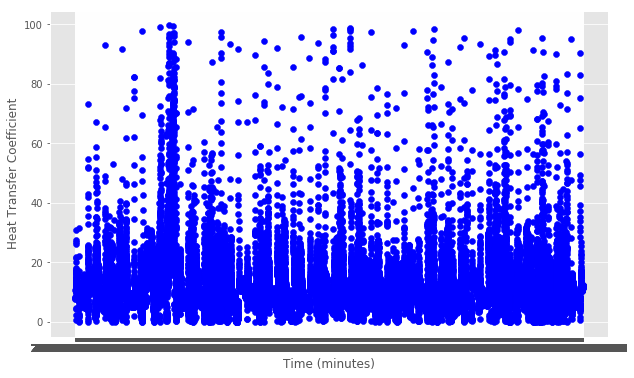

In [19]:
#This dataset has already been cleaned, but we are going to select for the most important/easily measured features.

data = data.drop(['T_Sonic_M'], axis=1)
data = data.drop(['T_Sonic_U'], axis=1)
data = data.drop(['M direction'], axis=1)
data = data.drop(['M speed'], axis=1)
data = data.drop(['U direction'], axis=1)
data = data.drop(['U speed'], axis=1)
data = data.drop(['HMP_TempC'], axis=1)
data = data.drop(['q'], axis=1)
data = data.drop(['CupWS_ms'], axis=1)
data = data.drop(['CupWD'], axis=1)
data = data.drop(['CupWD_SD'], axis=1)

#Then we will select for values of h that are reasonable (ie -8000 needs to be removed)
data = data[data.h > 0]
data = data[data.h <= 100]

#Now we can plot an example of some of the time vs h
plt.scatter(x=data['TIMESTAMP'],y=data['h'],c='b',marker='o',label='Time vs h')

plt.xlabel('Time (minutes)')
plt.ylabel('Heat Transfer Coefficient')
plt.show()

             ApogSWup  ApogSWdn  ApogLWup  ApogLWdn  CNR_SWup  CNR_SWdn  \
ApogSWup     1.000000  0.881619  0.312964  0.818710  0.925880  0.902171   
ApogSWdn     0.881619  1.000000  0.305066  0.798022  0.844740  0.866386   
ApogLWup     0.312964  0.305066  1.000000  0.646545  0.283540  0.264377   
ApogLWdn     0.818710  0.798022  0.646545  1.000000  0.770330  0.764178   
CNR_SWup     0.925880  0.844740  0.283540  0.770330  1.000000  0.986575   
CNR_SWdn     0.902171  0.866386  0.264377  0.764178  0.986575  1.000000   
CNR_LWup     0.301459  0.299308  0.919443  0.622726  0.282114  0.264419   
CNR_LWdn     0.835360  0.762103  0.571422  0.927002  0.880889  0.869701   
HMP_RH      -0.415589 -0.405406 -0.192516 -0.639970 -0.367638 -0.385876   
h            0.211458  0.293006  0.161051  0.234787  0.148361  0.168848   
L direction -0.455345 -0.442167 -0.149618 -0.410728 -0.435398 -0.431140   
L speed      0.324777  0.330578  0.319994  0.447735  0.313271  0.316686   
T_Sonic_L    0.632292  0.

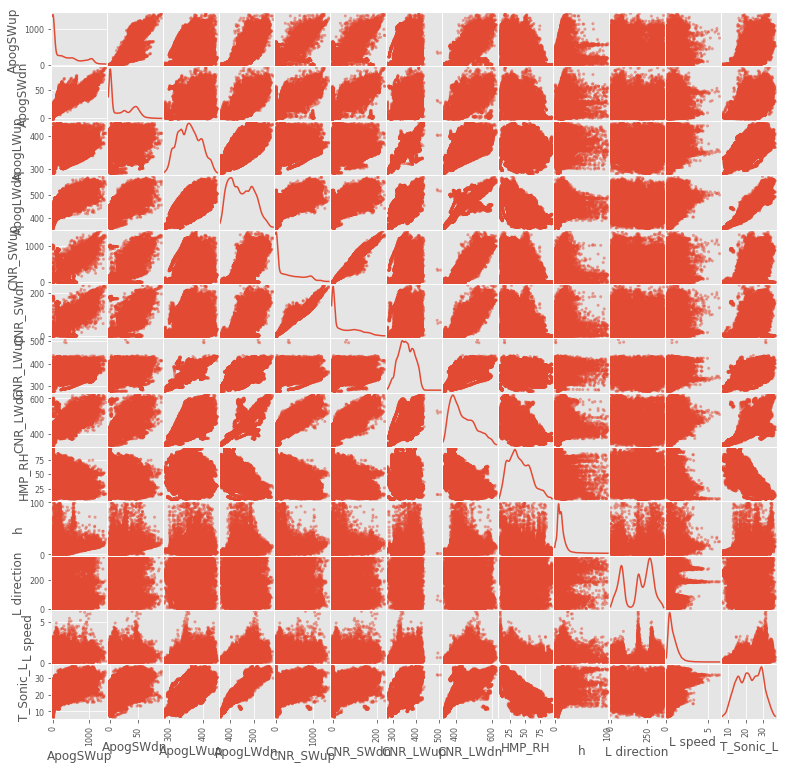

In [20]:
#Now we can display the correlations of each variable in the set along with a scatterplot
print(data.corr())
pd.plotting.scatter_matrix(data, figsize=(13, 13), diagonal='kde')
plt.show()

The most important part of the scatterplot to interpret is the last row corresponding to each variables impact on h.
<br/>

These scatterplots give us a way to intuit how each variable correlates with h, and the numerical correlation is also reported for a more comprehensible form of the effect of variables on h.
<br/>

The higher the correlation, the more important it is to account for these variables.
<br/>

This is one of the metrics we were able to use for judging the relative importance of different variables effects on h, below are a couple of the other methods we tried, however both of these methods are based on linear models which may not be as relevant on our actual model.

In [3]:
easy_data = pd.read_csv('easy_data.csv')

#scale the data
scaled_data = scale(easy_data)
scaled_dataframe = pd.DataFrame(scaled_data, columns = easy_data.columns)

#make a predictors and target variable to make the function inputs comprehensible
scaled_predictors = scaled_dataframe[scaled_dataframe.columns[0:len(scaled_dataframe.columns)-1]]
target = easy_data[easy_data.columns[len(easy_data.columns)-1]]

#strip the indices from the target variable
target = target.values

In [ ]:
# Variable selection using RFE on a linear kernel SVR
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel = 'linear')
selector = RFE(estimator, 3, step=1)
selector = selector.fit(scaled_predictors, target)
best_vars = predictors.columns[selector.get_support()]
print('Most important predictors:')
print(best_vars)

#this also gave us a ranking of the variables importance
print('rankings of the variables:')
for x in range(len(scaled_predictors.columns)):
    print('===========================')
    print(scaled_predictors.columns[x])
    print(selector.ranking_[x])

Due to the excessive runtime of the cell above (~23 SVRs at about 30 minutes each) we were unable to run it again when combining notebooks, but the output from before is shown below.

In [ ]:
"""rankings of the variables:
===========================
Time
20
===========================
ApogSWup
1
===========================
ApogSWdn
9
===========================
ApogLWup
4
===========================
ApogLWdn
22
===========================
CNR_SWup
11
===========================
CNR_SWdn
10
===========================
CNR_LWup
14
===========================
CNR_LWdn
18
===========================
HMP_TempC
17
===========================
HMP_RH
15
===========================
BattV
16
===========================
Btemp1
1
===========================
Btemp2
7
===========================
Btemp3
5
===========================
Btemp4
1
===========================
Btemp5
6
===========================
Btemp6
3
===========================
TempBmid
12
===========================
Btemp14
8
===========================
TempTmid
13
===========================
CupWS_ms
23
===========================
CupWD
21
===========================
CupWD_SD
19
===========================
q
2"""

Here we also have the SVR run without the sonic data.

In [4]:
def custom_scorer(predicted, true):
    index_count = 0
    correct_count = 0
    for x in predicted:
        if abs(x-true[index_count]) < 2:
            correct_count += 1
        index_count += 1
    return (correct_count/index_count)

In [5]:
X = scaled_predictors
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
model = SVR(C = 400)
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

custom_scorer(y_predict, y_test)

0.755936880227645

Below, several different regression techniques are employed and constructed such that we can use this data set to predict h. 

# Regression Techniques


In this section, we explore the use of linear regression, SVM and SVR, Sci-kit's built in neural network, and Keras neural networks. Each one was constructed and optimized for the data set to give the maximum accuracy for prediction of h. 


# Support Vector Methods

First, we perform a classification problem where the h is split into high and low categories based on the average value, and we see if we can predict if there is high or low efficiency in a solar farm on any given conditions.

In [21]:
#Describe our h values to determine the high and low range
data.h.describe()

count    38753.000000
mean        12.457586
std          9.895197
min          0.000360
25%          6.972691
50%         10.666934
75%         14.744254
max         99.662173
Name: h, dtype: float64

In [22]:
#Here we use the average determined above to split each row into either high (1) 
#or low(0) efficiency
avg_h = 12.457586
hi_low = []
data_h = data['h']


for row in data_h:
    if row >= avg_h:
        hi_low.append(1)
    else:
        hi_low.append(0)

#So we have created a binary classifier where 1 means a high h value, and 0 is a low.
#Now we create our SVM that classifies high or low.

#First clarify which columns we are using in our data set
dataX = data.drop(['h'], axis=1)
dataX = dataX.drop(['TIMESTAMP'], axis=1)

#Define our X and y for use in the train_test_split
X = dataX
y = hi_low

#Split data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.1)

#scale the data
scaler = StandardScaler()
scaler.fit(X_train) # Fit only to the training data

# Apply scaling to X data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Define model, method, and C value. Fit to training data
model = svm.SVC(kernel = 'rbf', C=50)
model.fit(X_train,y_train)

#print confusion matrix to analyze accuracy in classification
print('Confusion Matrix:')
y_predict = model.predict(X_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_predict))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_predict))

Confusion Matrix:
[[2312  154]
 [ 162 1248]]
Accuracy =  0.9184726522187823


So, we can see we have succeeded in creating a fairly accurate SVM classifier, this indicates the data may be sufficient for actually predicting h with resonable accuracy, which is good because that's what we'll be doing next.

# SVR (Regression)

In [23]:
#Now we run a SVR regression

#Define and split data again
X = dataX
y = data['h']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.1)


#scale the data
scaler = StandardScaler()
scaler.fit(X_train) # Fit only to the training data

# Apply scaling to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#define and fit the SVR model

model = SVR(C=50.0, epsilon=0.1)
model.fit(X_train,y_train)

print('Accuracy = ', model.score(X = X_test, y = y_test))

#Rather than the built in accuracy, we can also set a performance metric by
#finding if the absolute value of the h predicted is +/- a tolerance of the 
#true h value of the test set.

#Define a tolerance
tol = 2

#Predict
y_pred_svm = model.predict(X_test)

count = 0

#calculate success
for idx, i in enumerate(y_pred_svm):
    if (abs(i - y_test.iloc[idx]) < tol):
        count += 1

#The function below calculates what percentage of our prediction was within tolerance.

Acc = round((count/len(y_pred_svm))*100,3)

print('Percent Success = ' + str(round(Acc)) + '%')

#For visualization purposes, we predict using this model for the entire data set to plot later on.


dataX_avg = scaler.transform(dataX)
svm_pred_avg = model.predict(dataX_avg)

initi = 0
counter = 1440
svmt = int(counter/2)
data_avg_svm = []
svm_time = []

while counter <= len(data):
    avg = svm_pred_avg[initi:counter]
    avg = np.mean(avg)
    data_avg_svm.append(avg)
    svm_time.append(data.TIMESTAMP.iloc[svmt])
    counter += 1440
    initi += 1440
    svmt = int(counter/2)



Accuracy =  0.5397523948114832
Percent Success = 75%


Using our condition that the h value can only vary a magnitude of 2 from the true value in the test data set, we achieve around 75% success. This is with an arbitrary C value, below is a loop that optimizes different values to maximize success of the SVM.


In [24]:
# c_val = 1
# opt_success = []
# c_val_array = []

# # while c_val < 500:
# #     model_SVR = SVR(C=c_val, epsilon=0.2)
# #     model_SVR.fit(X_train,y_train)
# #     y_pred_svm = model.predict(X_test)

# #     count2 = 0

# #     for idx, i in enumerate(y_pred_svm):
# #         if (abs(i - y_test.iloc[idx]) < 2):
# #             count2 += 1
        
# #     success = count2/len(y_pred_svm)
# #     opt_success.append(success)
# #     c_val_array.append(c_val)
# #     c_val += 50
# #     print(c_val)


# plt.scatter(x=c_val_array,y=opt_success,label='Optimal C value')

# plt.xlabel('C value')
# plt.ylabel('Percent success')
# plt.show()
    

Above is a graph of the C value plotted vs the success. From above we can store the max of the success file as below, and use this C in the future for the optimal value.

# SciKit-Learn Neural Network

Below we use a MLP regressor to predict values of h and measure the success of the network with the same tolerance method used in the SVR.

In [25]:
# MLP regression.

#Start by defining the model architecture and constants. These were varyed and optimized
#to the current values

mlp_reg = MLPRegressor(hidden_layer_sizes=(12,15,6),verbose=0,random_state=3,solver='adam', max_iter = 10000)

#fit the model to the training data
mlp_reg.fit(X_train, y_train)

#print score of the test and train to get an idea of the performance and level of fitting.

print(mlp_reg.score(X_test,y_test)) # score = 1 is good
print(mlp_reg.score(X_train,y_train)) # score = 1 is good

#Now we analyze the success with the same method as SVR.

y_pred_mlp = model.predict(X_test)

count = 0

for idx, i in enumerate(y_pred_mlp):
    if (abs(i - y_test.iloc[idx]) < tol):
        count += 1
        
Acc2 = (count/len(y_pred_mlp))*100

print('Percent Success = ' + str(round(Acc2,3)) + '%')

#Again, we use the predict function to compute averages to compare at the end.

#scale all data and predict
dataX_avg = scaler.transform(dataX)
svm_pred_sk = model.predict(dataX_avg)

initi = 0
counter = 1440
skt = int(counter/2)
data_avg_sk = []
sk_time = []

while counter <= len(data):
    avg = svm_pred_sk[initi:counter]
    avg = np.mean(avg)
    data_avg_sk.append(avg)
    sk_time.append(data.TIMESTAMP.iloc[skt])
    counter += 1440
    initi += 1440
    skt = int(counter/2)

0.595942428180227
0.663400729596158
Percent Success = 75.284%


Now we use Keras to see if a more sophisticated learning network is capable of producing even better results.

# Keras

In [26]:
# create model with sequential and vary parameters to reach an optimal success rate.
kmodel = Sequential()
kmodel.add(Dense(20, kernel_initializer='normal', activation='relu', input_dim=12))
kmodel.add(Dense(10, activation='tanh'))
kmodel.add(Dropout(0.1))
kmodel.add(Dense(1, activation='relu'))

kmodel.summary()

kmodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Define the data to be used

X = dataX
y = data['h']

#Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.1)

# Apply scaling to data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Fit the keras model
keras_model = kmodel.fit(X_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test))


Train on 34877 samples, validate on 3876 samples
Epoch 1/10
34877/34877 [==============================] - 8s 221us/step - loss: 97.5562 - acc: 0.0000e+00 - val_loss: 79.3047 - val_acc: 0.0000e+00
Epoch 2/10
34877/34877 [==============================] - 6s 183us/step - loss: 73.2296 - acc: 0.0000e+00 - val_loss: 63.8130 - val_acc: 0.0000e+00
Epoch 3/10
34877/34877 [==============================] - 6s 174us/step - loss: 63.1815 - acc: 0.0000e+00 - val_loss: 56.6684 - val_acc: 0.0000e+00
Epoch 4/10
34877/34877 [==============================] - 6s 174us/step - loss: 58.6528 - acc: 0.0000e+00 - val_loss: 52.6939 - val_acc: 0.0000e+00
Epoch 5/10
34877/34877 [==============================] - 6s 171us/step - loss: 55.6648 - acc: 0.0000e+00 - val_loss: 50.7766 - val_acc: 0.0000e+00
Epoch 6/10
34877/34877 [==============================] - 6s 175us/step - loss: 54.2991 - acc: 0.0000e+00 - val_loss: 49.8126 - val_acc: 0.0000e+00
Epoch 7/10
34877/34877 [==============================] - 6s 18

In [28]:
#Evaluate the success of prediction for keras.

y_pred = kmodel.predict(X_test)

count = 0

for idx, i in enumerate(y_pred):
    if (abs(i - y_test.iloc[idx]) < tol):
        count += 1
        
Acc3 = (count/len(y_pred))*100

print('Percent Success = ' + str(round(Acc3,3)) + '%')

#Now we create the pred to compare the averages

#scale all data and predict

dataX_avg = scaler.transform(dataX)
svm_pred_k = kmodel.predict(dataX_avg)

initi = 0
counter = 1440
kt = int(counter/2)
data_avg_k = []
k_time = []

while counter <= len(data):
    avg = svm_pred_k[initi:counter]
    avg = np.mean(avg)
    data_avg_k.append(avg)
    k_time.append(data.TIMESTAMP.iloc[kt])
    counter += 1440
    initi += 1440
    kt = int(counter/2)




Percent Success = 58.101%


# Results


Now that we have successes for each method and they have been optimized, we can create averages of the weeks for the real data and plot it over the predicted averages per week to obtain a visualization of how well each method is performing. We can also construct a simple table to numerically compare the success of each method.

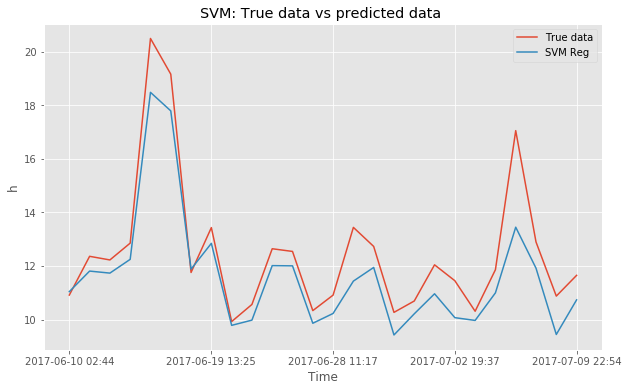

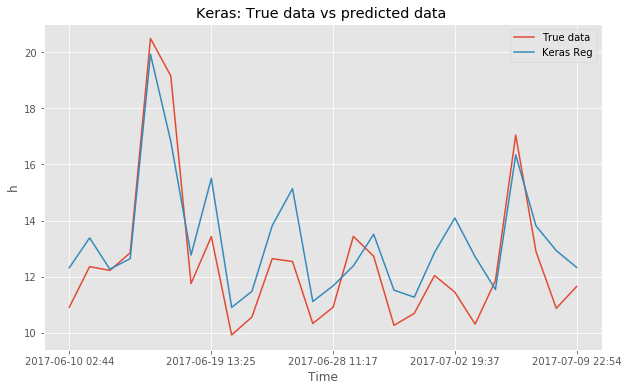

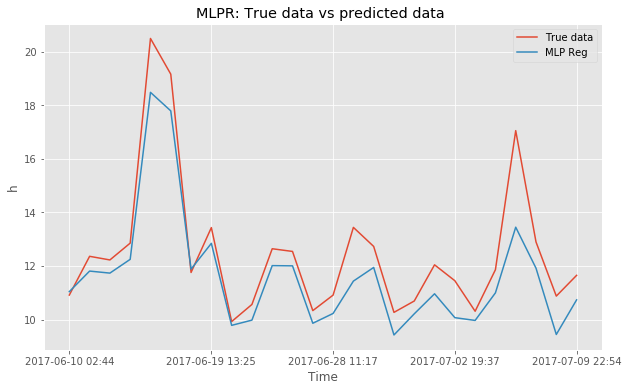

Percent Success of methods within 2% accuracy.

SVM Reg    MLP Reg      Keras
 75.284  75.283798  58.101135


In [29]:
#Initialize for the daily averages calculations
initi = 0
counter = 1440
time_stamp = int(counter/2)
data_avg = []
time_array = []

#loop finds the average over every 1440 minutes and saves the rough date with the avg
while counter <= len(data):
    avg = data[initi:counter]
    avg = avg.h
    avg = np.mean(avg)
    data_avg.append(avg)
    time_array.append(data.TIMESTAMP.iloc[time_stamp])
    counter += 1440
    initi += 1440
    time_stamp = int(counter/2)

#Plot the true average over the predicted average

fig, ax = plt.subplots()

ticks_l = [time_array[0], time_array[7], time_array[13], time_array[19], time_array[25]]
tickp = [time_array[0], time_array[7], time_array[13], time_array[19], time_array[25]]


plt.plot(time_array,data_avg, label = 'True data')
plt.plot(svm_time,data_avg_svm, label = 'SVM Reg')
plt.title('SVM: True data vs predicted data ')
plt.xlabel('Time')
ax.set_xticks(tickp)
ax.set_xticklabels(ticks_l)
plt.ylabel('h')
plt.legend()
plt.show()


fig, ax = plt.subplots()

ticks_l = [time_array[0], time_array[7], time_array[13], time_array[19], time_array[25]]
tickp = [time_array[0], time_array[7], time_array[13], time_array[19], time_array[25]]



plt.plot(time_array,data_avg, label = 'True data')
plt.plot(k_time,data_avg_k, label = 'Keras Reg')
plt.title('Keras: True data vs predicted data ')
plt.xlabel('Time')
ax.set_xticks(tickp)
ax.set_xticklabels(ticks_l)
plt.ylabel('h')
plt.legend()
plt.show()


fig, ax = plt.subplots()

ticks_l = [time_array[0], time_array[7], time_array[13], time_array[19], time_array[25]]
tickp = [time_array[0], time_array[7], time_array[13], time_array[19], time_array[25]]


plt.plot(time_array,data_avg, label = 'True data')
plt.plot(sk_time,data_avg_sk, label = 'MLP Reg')
plt.title('MLPR: True data vs predicted data ')
plt.xlabel('Time')
ax.set_xticks(tickp)
ax.set_xticklabels(ticks_l)
plt.ylabel('h')
plt.legend()
plt.show()

Accs = [Acc, Acc2, Acc3]

labels = ['SVM Reg', 'MLP Reg', 'Keras']
table = pd.DataFrame(data = Accs).transpose()

table.columns = [labels]

print('Percent Success of methods within +/- 2 accuracy.')
print()
print(table.to_string(index=False))